In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
import os
from time import sleep
sys.path.append(os.path.abspath('../'))

# Para visualización de datos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar los datos
# -----------------------------------------------------------------------
import pickle

# Para sistemas de recomendacion basados en cotenido
# -----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer # Vectorizacion / tokenizacion 
from sklearn.metrics.pairwise import cosine_similarity #  Cosine Similarity post Vectorizacion

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_sistemas_recomendacion as sr

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [4]:
# cargamos lso datos
df = pd.read_pickle('../datos/datos_api.pkl')
df.head()


,id,titleText,releaseYear,releaseMonth,Categoria,Tipo
0,tt0059325,Jahrgang 45,1990.0,10.0,Drama,movie
1,tt0059900,"Wenn du groß bist, lieber Adam",1990.0,10.0,Drama,movie
2,tt0065188,"Vojtech, receny sirotek",1990.0,10.0,Drama,movie
3,tt0068494,Domo Arigato,1990.0,8.0,Drama,movie
4,tt0075259,Spy Story,1990.0,3.0,Drama,movie


In [6]:
# realizamos la vectorización, es decir, convertimos el texto a vectores para poder calcular las distancias entre películas
vectorizer = CountVectorizer(max_features=1000,stop_words= "english")

# vectorizamos la columna objetivo
X = vectorizer.fit_transform(df_contenido['tags_v2']).toarray()

# calculamos sus distancias
similarity = cosine_similarity(X)
similarity[:20]

array([[1.        , 0.14279011, 0.12999071, ..., 0.02042093, 0.13876378,
        0.02073755],
       [0.14279011, 1.        , 0.01151176, ..., 0.        , 0.17204159,
        0.02326211],
       [0.12999071, 0.01151176, 1.        , ..., 0.        , 0.08714204,
        0.        ],
       ...,
       [0.14634996, 0.18898224, 0.02030483, ..., 0.06060606, 0.0216752 ,
        0.02051525],
       [0.18899829, 0.10965862, 0.07776158, ..., 0.        , 0.12451456,
        0.03928371],
       [0.17507296, 0.14027577, 0.11190706, ..., 0.03711348, 0.13273297,
        0.06281486]])

In [9]:
# definimos la película que le gusta al usuario para poder realizar las recomendaciones
pelicula_usuario = 'Cars'

# buscamos el inidice de la pelicula, ya que lo vamos a necesitar para nuestro objetivo
movie_index = sr.get_index_from_title(pelicula_usuario, df_contenido)

# sacamos las peliculas similares
similar_movies = list(enumerate(similarity[movie_index]))
similar_movies[:3]

[(0, np.float64(0.6737482773495361)),
 (1, np.float64(0.04315520622344067)),
 (2, np.float64(0.038253001811309445))]

In [10]:
# ordenamos las peliculas
peli_similares_ordenadas = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:21] # [1:21] si lo cambiamos a [0:21] la tenemos a ella misma 
peli_similares_ordenadas[:3]

[(17786, np.float64(0.9349055577176139)),
 (42810, np.float64(0.9190856264406226)),
 (3940, np.float64(0.9183486909853389))]

/var/folders/gq/ms0v5g8s3tngswn6ym0ddcc00000gp/T/ipykernel_56156/2644151083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


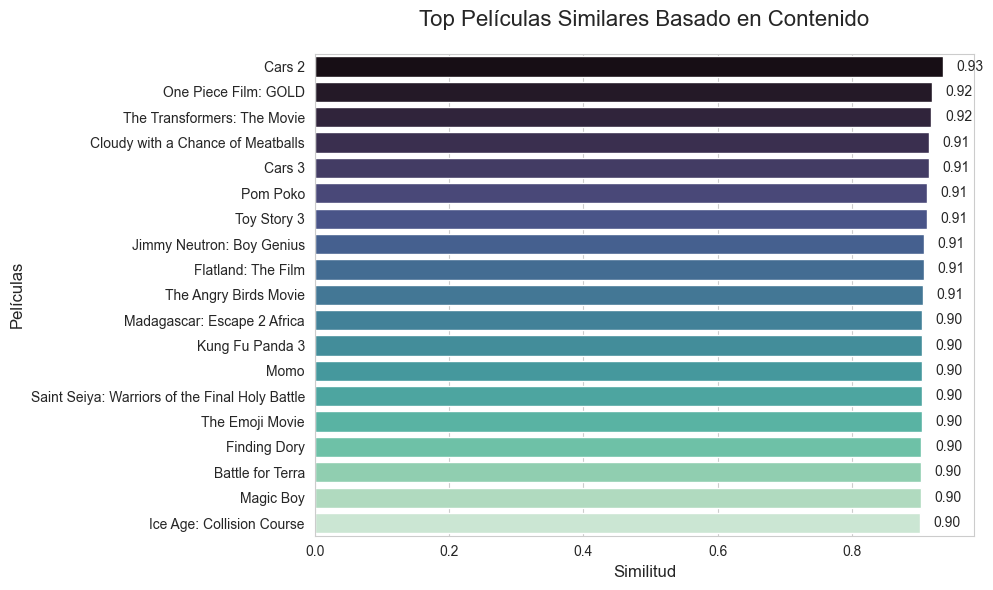

In [12]:
# y ahora buscamos el título
top_simiar_movies = {}
for i in peli_similares_ordenadas:
    top_simiar_movies[sr.get_title_from_index(i[0], df_contenido)] = i[1]

# visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(
    x=list(top_simiar_movies.values()), 
    y=list(top_simiar_movies.keys()), 
    palette="mako"
)

# Añadir etiquetas y título
plt.title("Top Películas Similares Basado en Contenido", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Películas", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_simiar_movies.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
